<a href="https://colab.research.google.com/github/Sarajaldin/Richest-Persons/blob/main/richest_persons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

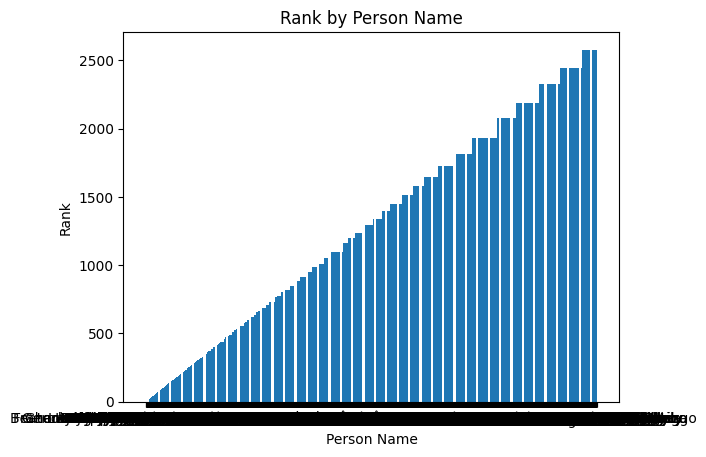

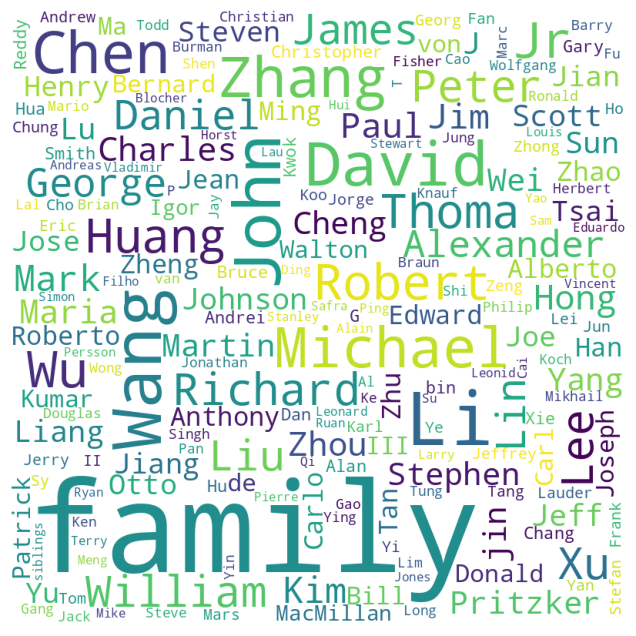

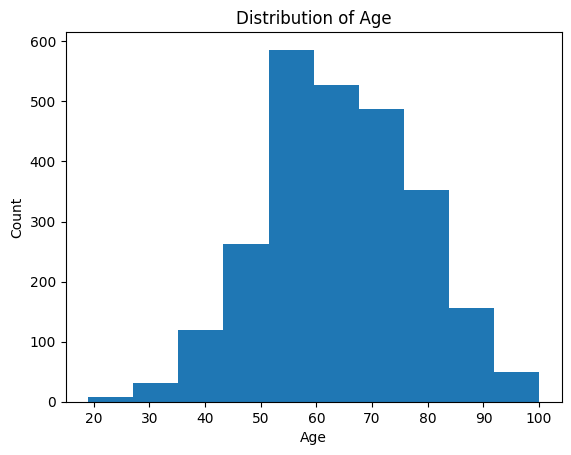

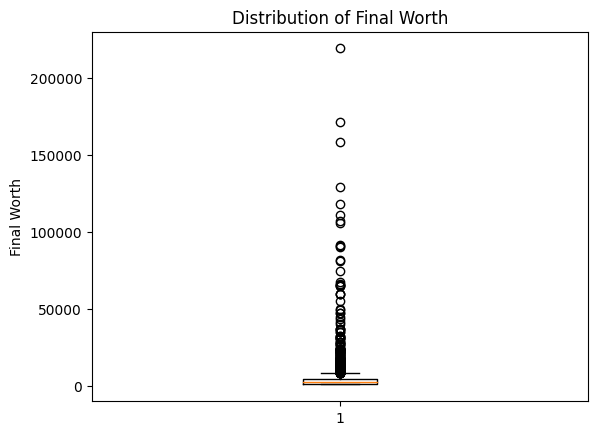

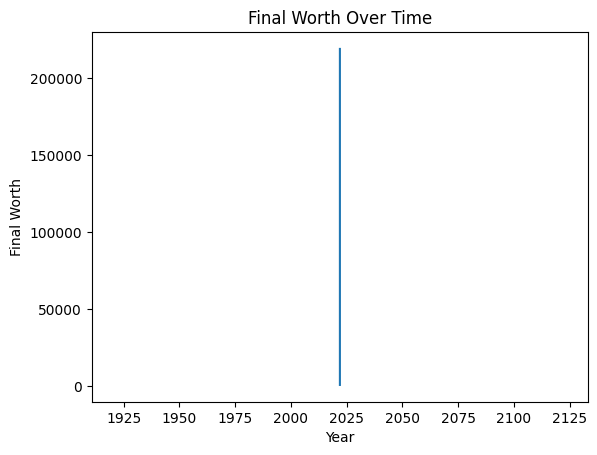

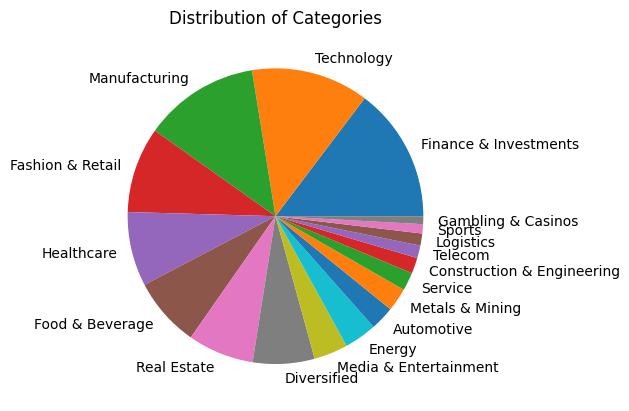

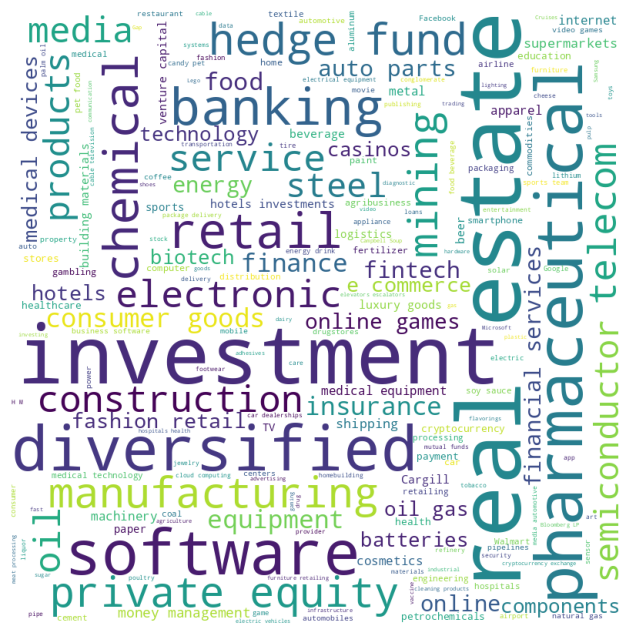

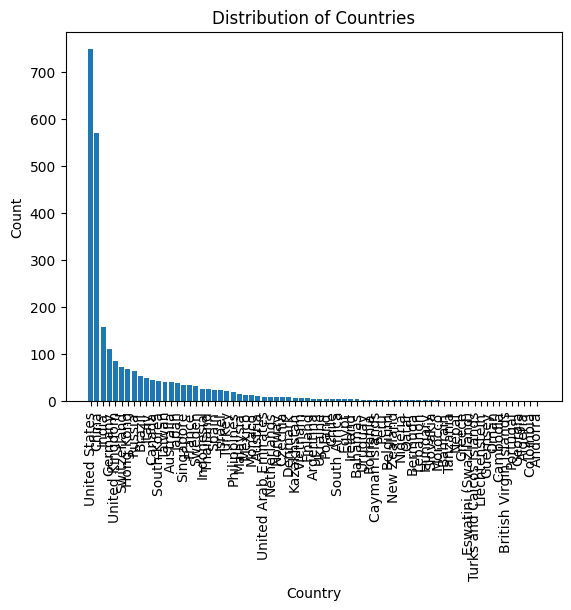

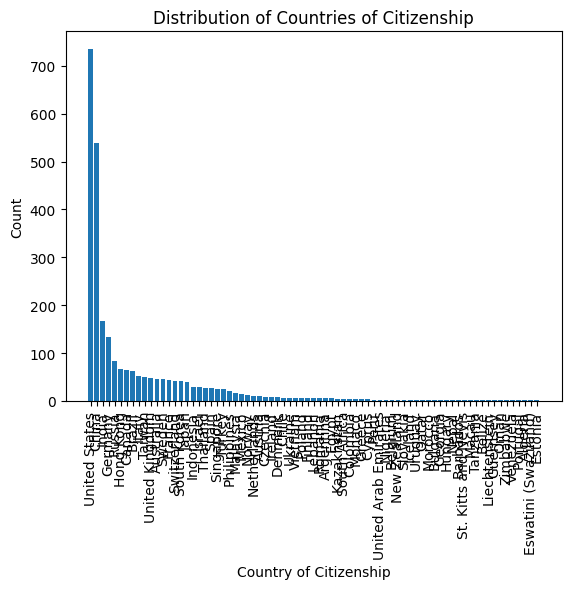

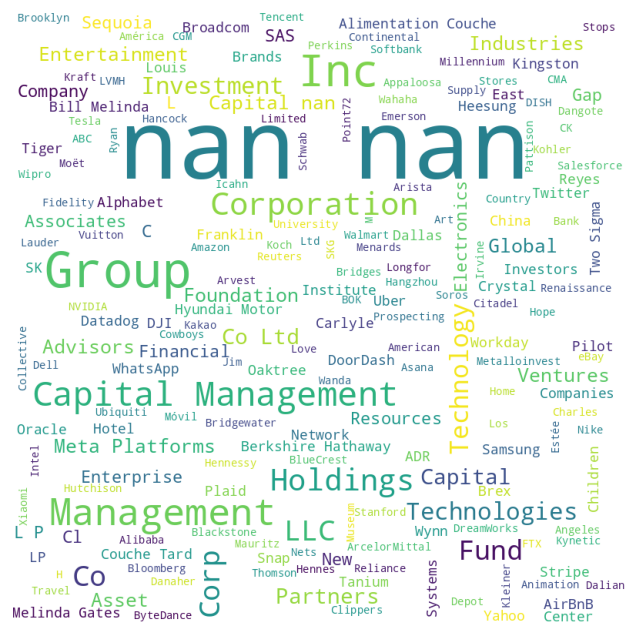

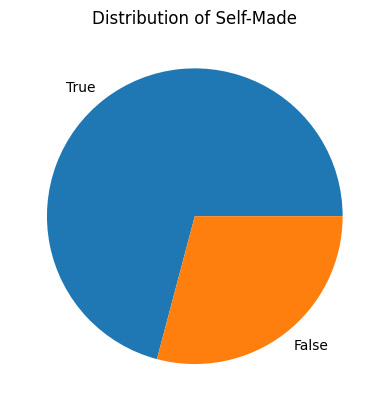

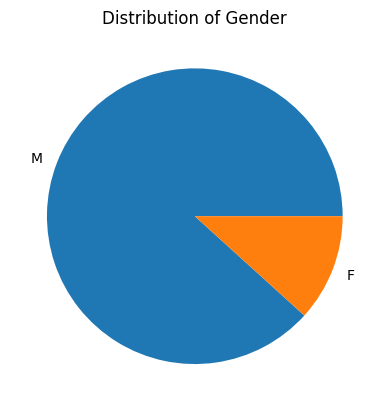

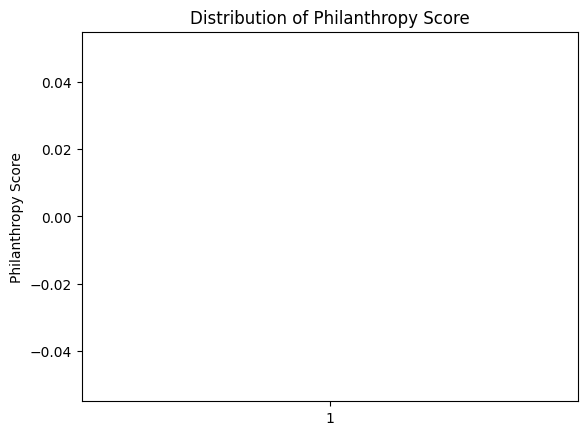

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas dataframe
url = 'https://raw.githubusercontent.com/Sarajaldin/Richest-Persons/main/forbes_2022_billionaires7.csv'
# url='https://github.com/Sarajaldin/Richest-Persons/blob/0fddd7b65fa18a8b3a023c3c3948f74941cb8460/forbes_2022_billionaires7.csv'
data = pd.read_csv(url, on_bad_lines='skip')

# Bar chart for Rank
plt.bar(df['personName'], df['rank'])
plt.xlabel('Person Name')
plt.ylabel('Rank')
plt.title('Rank by Person Name')
plt.show()

# Word cloud for PersonName
from wordcloud import WordCloud

# Join all the words in the PersonName column into a single string
text = ' '.join(df['personName'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Histogram for Age
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Box plot for FinalWorth
plt.boxplot(df['finalWorth'])
plt.ylabel('Final Worth')
plt.title('Distribution of Final Worth')
plt.show()

# Line chart for Year
plt.plot(df['year'], df['finalWorth'])
plt.xlabel('Year')
plt.ylabel('Final Worth')
plt.title('Final Worth Over Time')
plt.show()

# Pie chart for Category
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index)
plt.title('Distribution of Categories')
plt.show()

# Word cloud for Source
text = ' '.join(df['source'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Bar chart for Country
country_counts = df['country'].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.show()

# Bar chart for CountryOfCitizenship
citizenship_counts = df['countryOfCitizenship'].value_counts()
plt.bar(citizenship_counts.index, citizenship_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country of Citizenship')
plt.ylabel('Count')
plt.title('Distribution of Countries of Citizenship')
plt.show()

# Word cloud for Organization
text = ' '.join(df['organization'].astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Pie chart for SelfMade
selfmade_counts = df['selfMade'].value_counts()
plt.pie(selfmade_counts, labels=selfmade_counts.index)
plt.title('Distribution of Self-Made')
plt.show()

# Pie chart for Gender
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index)
plt.title('Distribution of Gender')
plt.show()

# Box plot for PhilanthropyScore
plt.boxplot(df['philanthropyScore'])
plt.ylabel('Philanthropy Score')
plt.title('Distribution of Philanthropy Score')
plt.show()

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import scipy.stats as st

In [8]:
mydata = pd.read_csv('https://raw.githubusercontent.com/Sarajaldin/Richest-Persons/main/forbes_2022_billionaires7.csv')

mydata.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   int64  
 4   year                  2668 non-null   int64  
 5   category              2668 non-null   object 
 6   source                2668 non-null   object 
 7   country               2655 non-null   object 
 8   countryOfCitizenship  2668 non-null   object 
 9   organization          352 non-null    object 
 10  selfMade              2668 non-null   bool   
 11  gender                2652 non-null   object 
 12  philanthropyScore     396 non-null    float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15          

In [9]:
mydata.head(3)

,rank,personName,age,finalWorth,year,category,source,country,countryOfCitizenship,organization,...,philanthropyScore,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,Elon Musk,50.0,219000,2022,Automotive,"Tesla, SpaceX",United States,United States,Tesla,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jeff Bezos,58.0,171000,2022,Technology,Amazon,United States,United States,Amazon,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bernard Arnault & family,73.0,158000,2022,Fashion & Retail,LVMH,France,France,LVMH Moët Hennessy Louis Vuitton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mydata.tail(3)

,rank,personName,age,finalWorth,year,category,source,country,countryOfCitizenship,organization,...,philanthropyScore,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
2665,2578,Wen Zhou & family,57.0,1000,2022,Manufacturing,chemicals,China,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2666,2578,Zhou Yifeng & family,43.0,1000,2022,Energy,liquefied petroleum gas,China,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2667,2578,Zhuang Kuilong & family,59.0,1000,2022,Manufacturing,polyester,China,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'finalWorth'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'philanthropyScore'}>,
        <Axes: title={'center': 'Unnamed: 13'}>,
        <Axes: title={'center': 'Unnamed: 14'}>,
        <Axes: title={'center': 'Unnamed: 15'}>],
       [<Axes: title={'center': 'Unnamed: 16'}>,
        <Axes: title={'center': 'Unnamed: 17'}>,
        <Axes: title={'center': 'Unnamed: 18'}>,
        <Axes: title={'center': 'Unnamed: 19'}>],
       [<Axes: title={'center': 'Unnamed: 20'}>,
        <Axes: title={'center': 'Unnamed: 21'}>, <Axes: >, <Axes: >]],
      dtype=object)

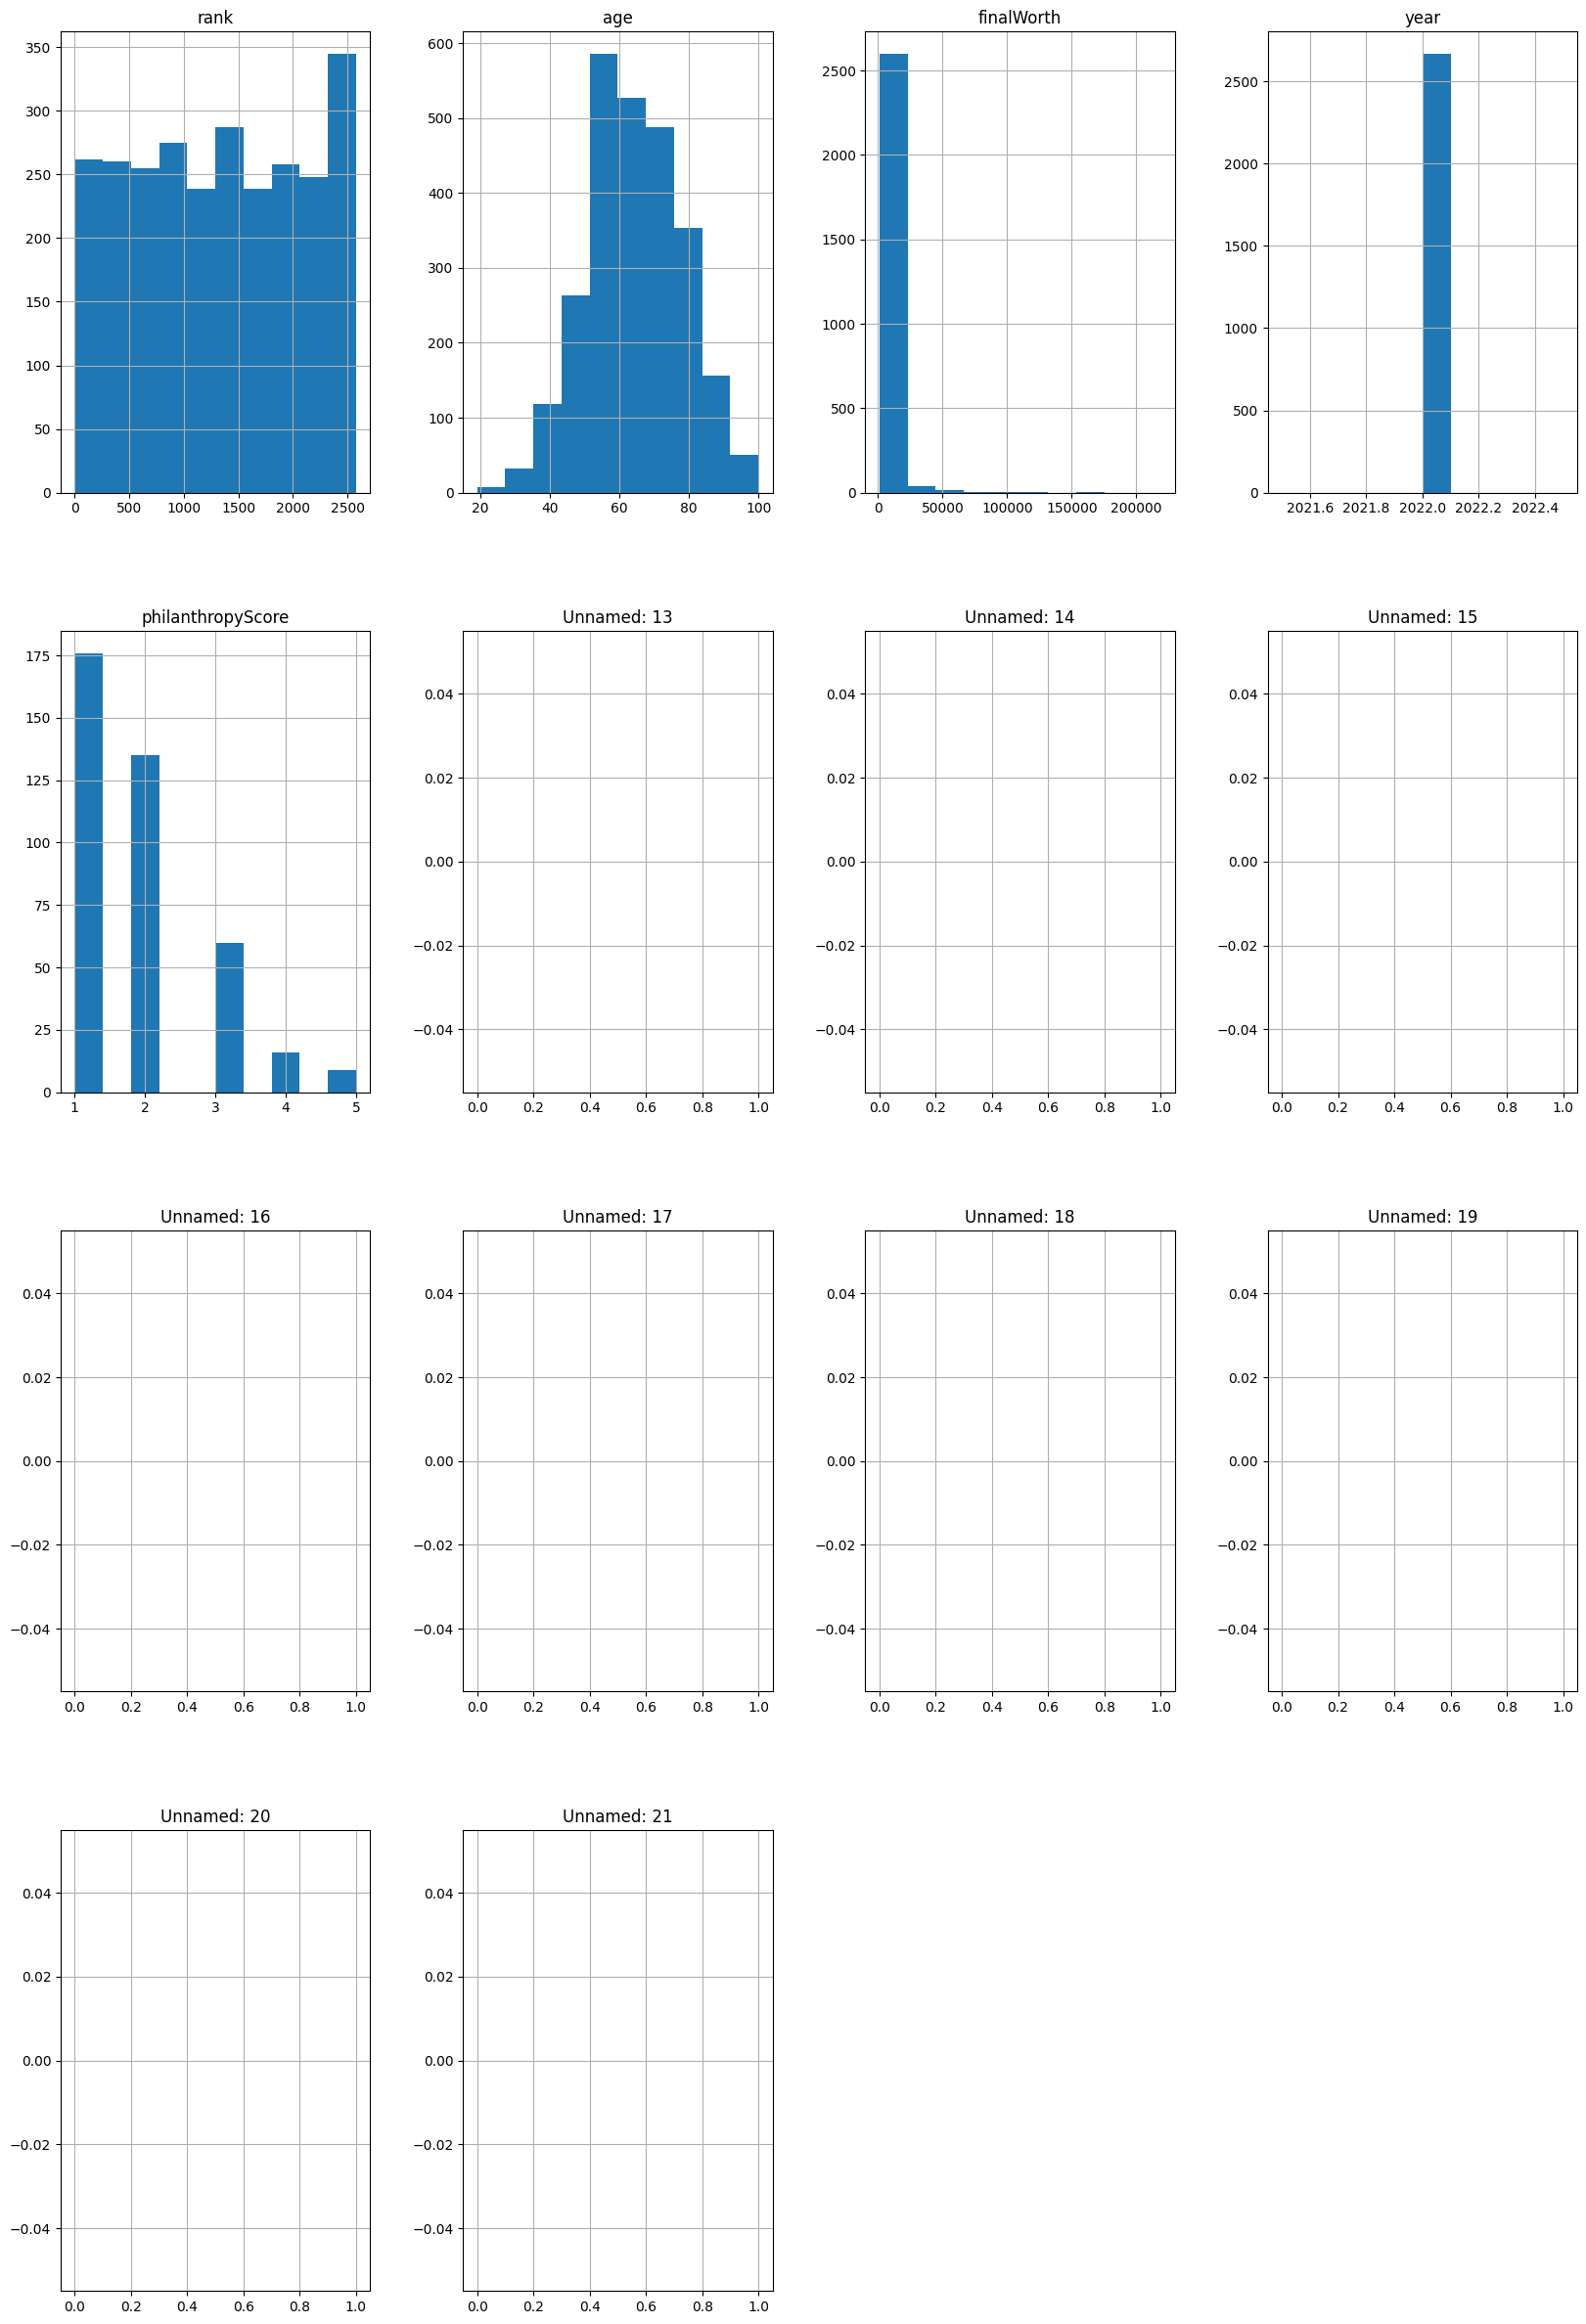

In [11]:
mydata.hist(figsize=(20,30))

<Axes: xlabel='personName', ylabel='age'>

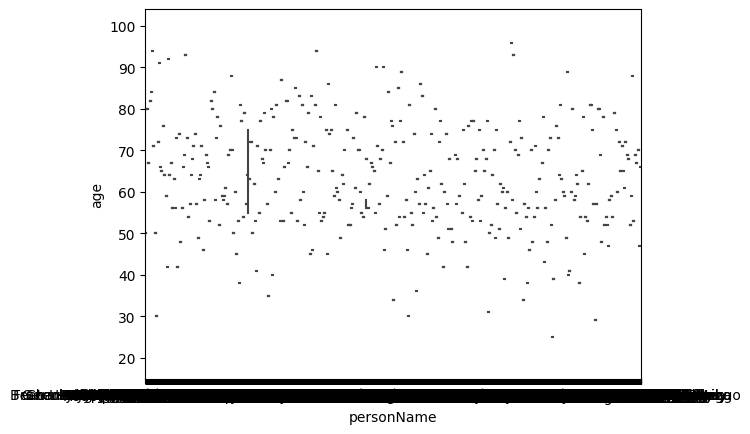

In [13]:
sns.boxplot(x="personName", y="age", data=mydata)

In [16]:
pd.crosstab(mydata['finalWorth'],mydata['year'] )

year,2022
finalWorth,
1000,91
1100,130
1200,124
1300,134
1400,114
...,...
118000,1
129000,1
158000,1


<Axes: xlabel='finalWorth', ylabel='count'>

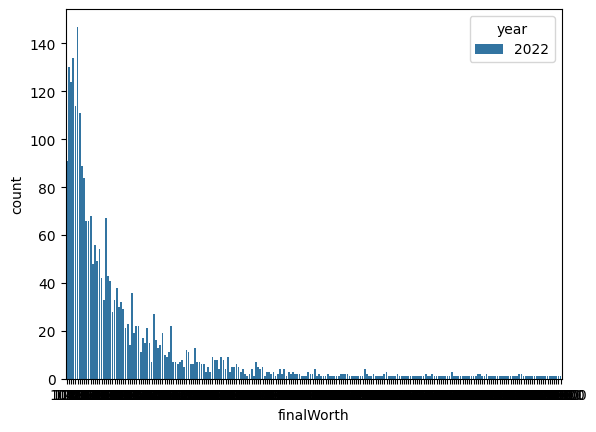

In [18]:
sns.countplot(x="finalWorth", hue="year", data=mydata)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


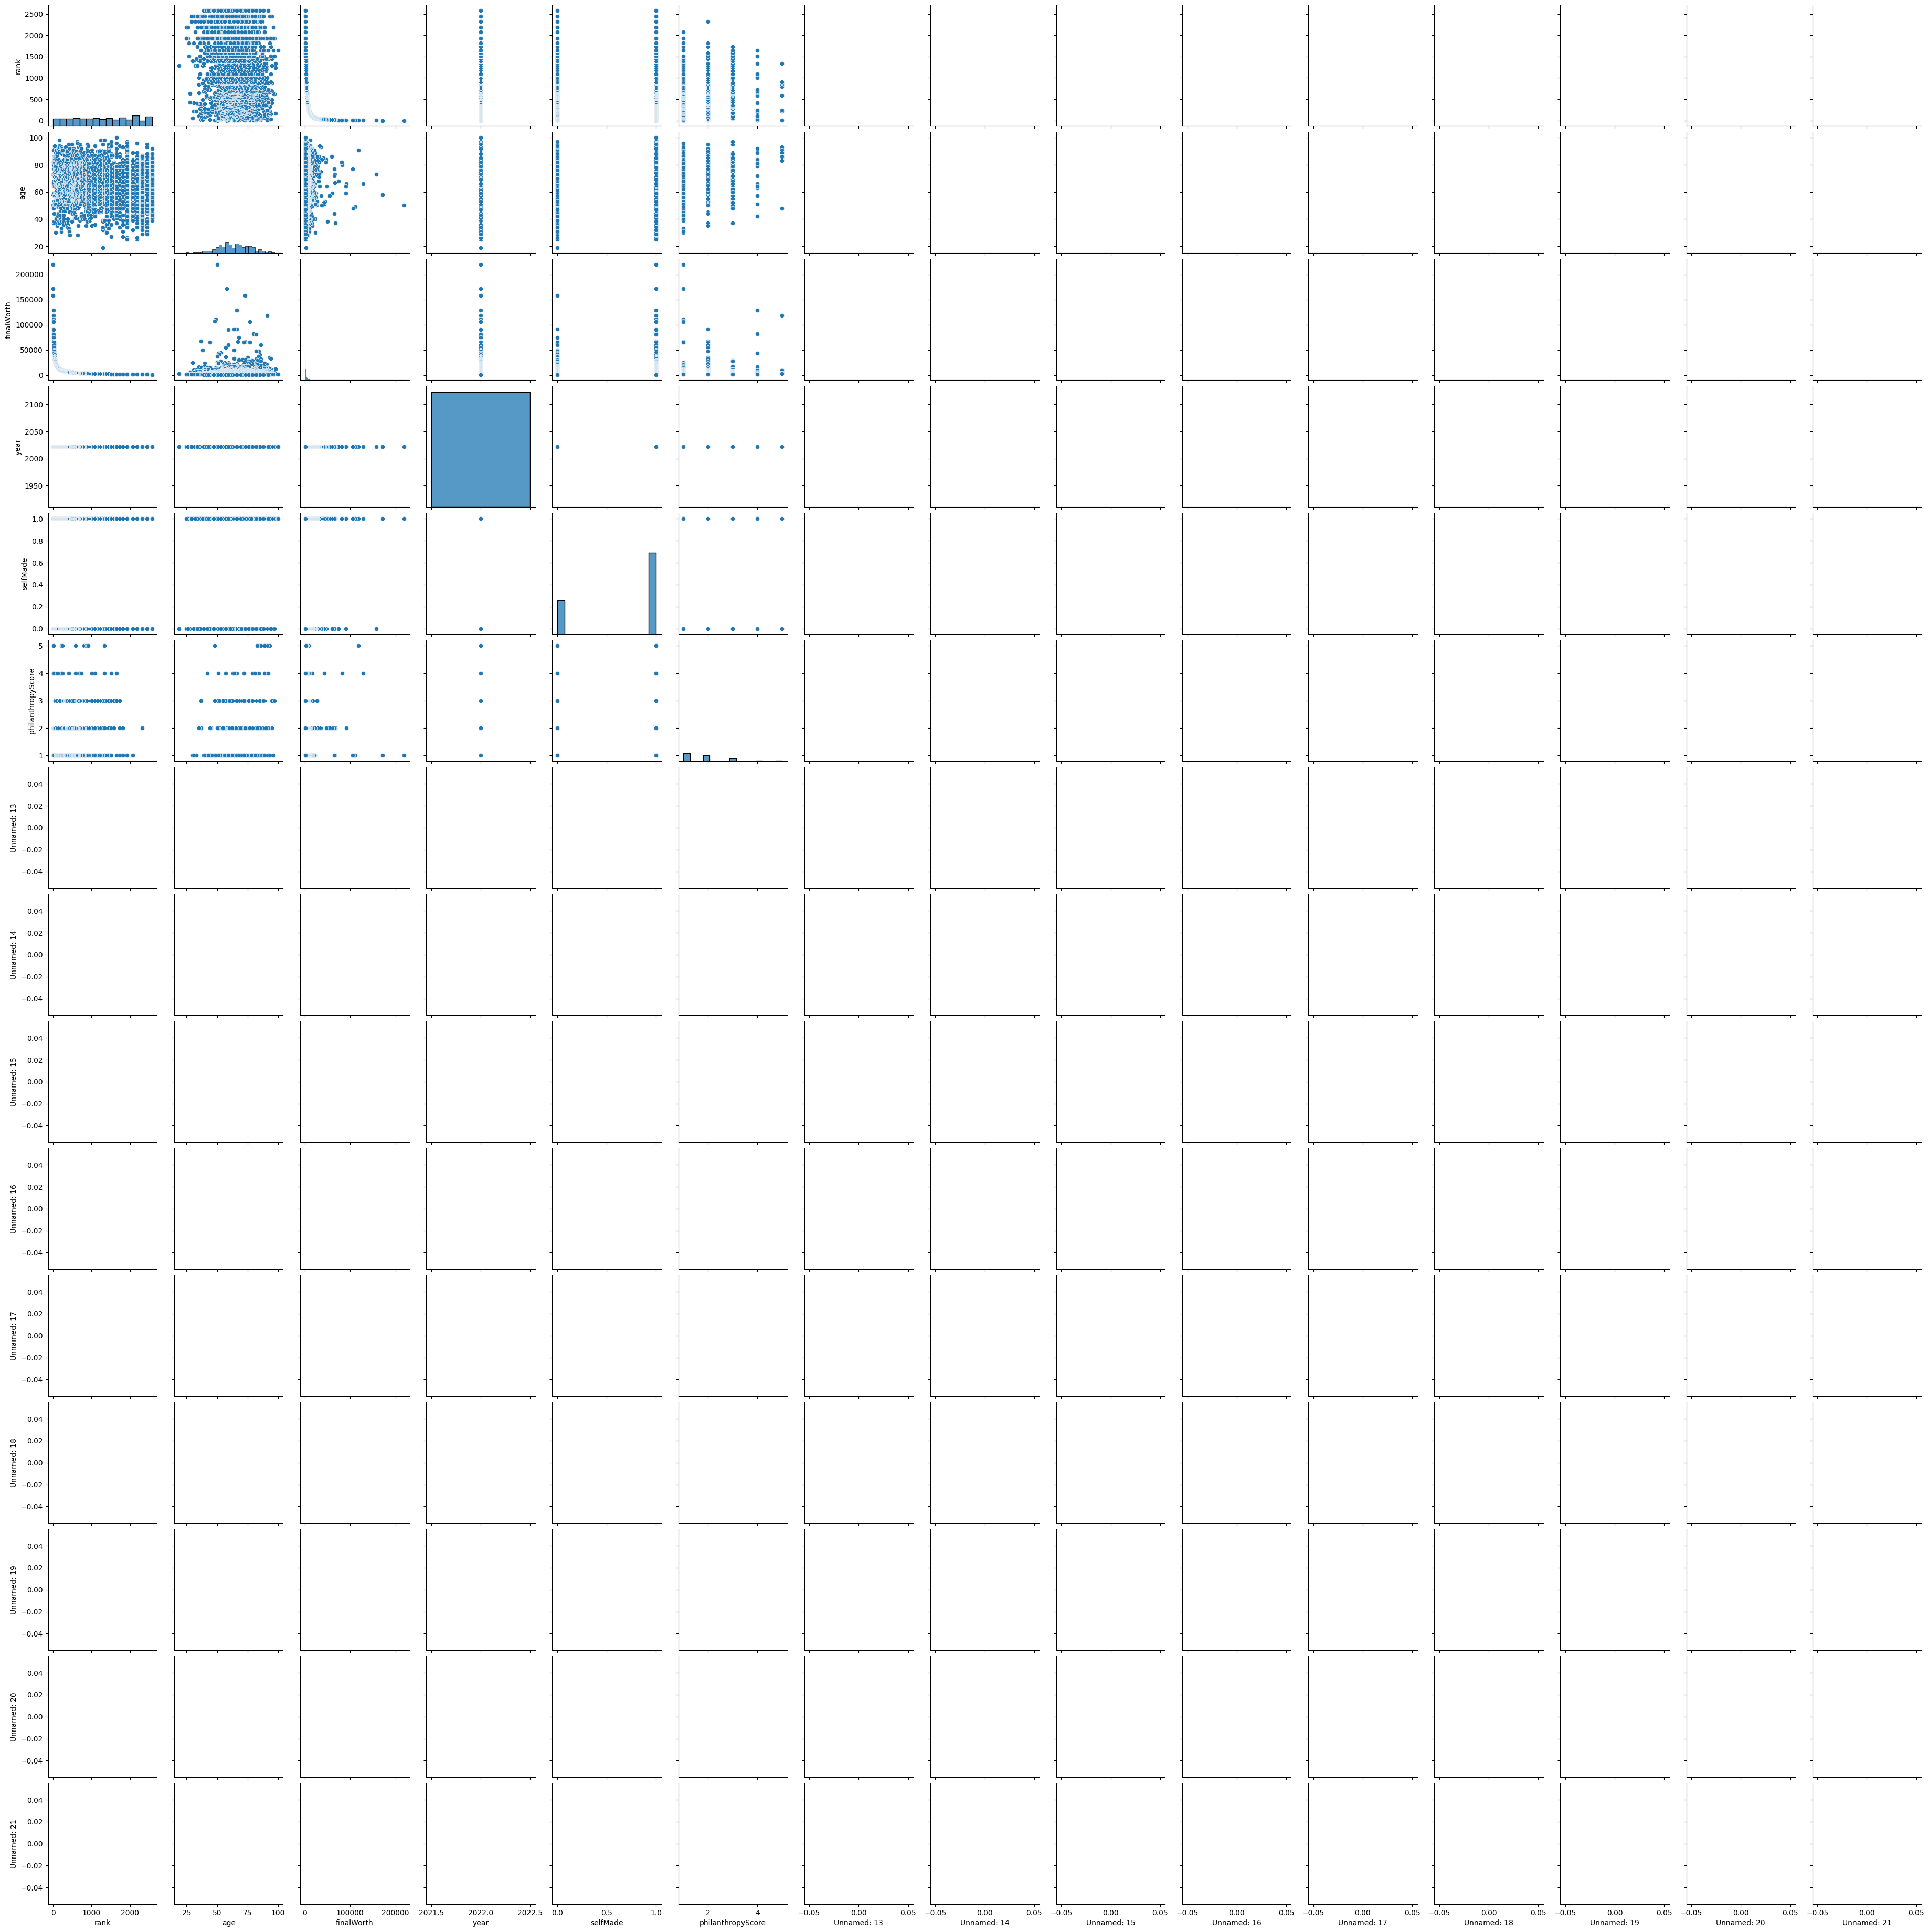

In [26]:
sns.pairplot(mydata)

In [30]:
mydata['age'].mean()

64.21068938807126

<ipython-input-31-045eb732d2fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['age'])


<Axes: xlabel='age', ylabel='Density'>

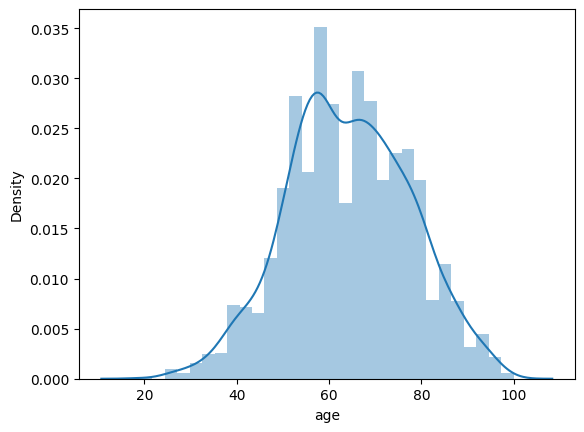

In [31]:
sns.distplot(mydata['age'])

In [36]:
np.random.seed(35)

In [37]:
x = st.skewnorm.rvs(-5, size=100000)

In [38]:
x[0:10]

array([-2.032545  , -0.65865997, -0.9932741 , -1.0242147 , -1.32978379,
       -0.7971542 , -1.01195544, -1.25557855, -1.06821979, -0.67242547])